In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

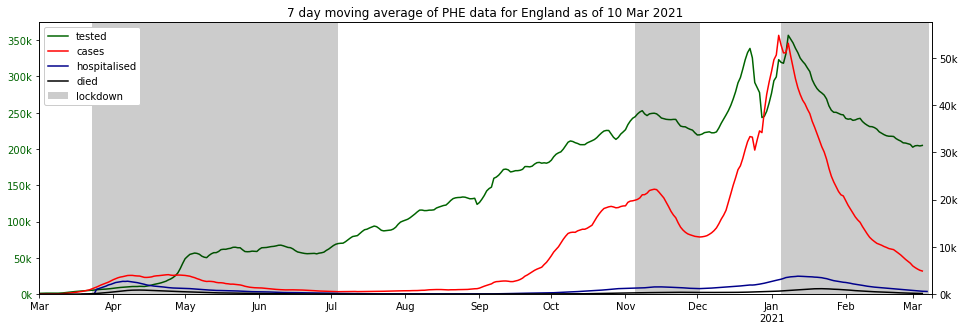

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum,),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

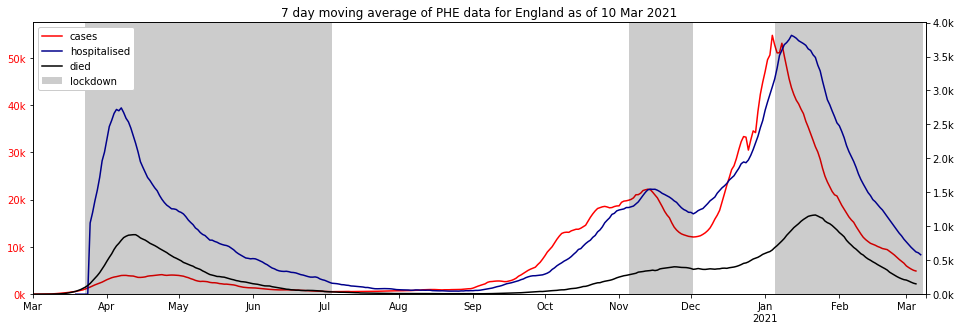

In [3]:
plot_summary(left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,868272.0,19380360.0,18512088.0,56286961,1.542581,32.888768,65.568651
1,Northern Ireland,N92000002,46927.0,601101.0,554174.0,1893667,2.478102,29.264596,68.257302
2,Scotland,S92000003,132760.0,1809158.0,1676398.0,5463300,2.430033,30.684714,66.885253
3,Wales,W92000004,206394.0,1019210.0,812816.0,3152879,6.546207,25.780120,67.673672


'partial: 22,809,829 (34.1%), full: 1,254,353'

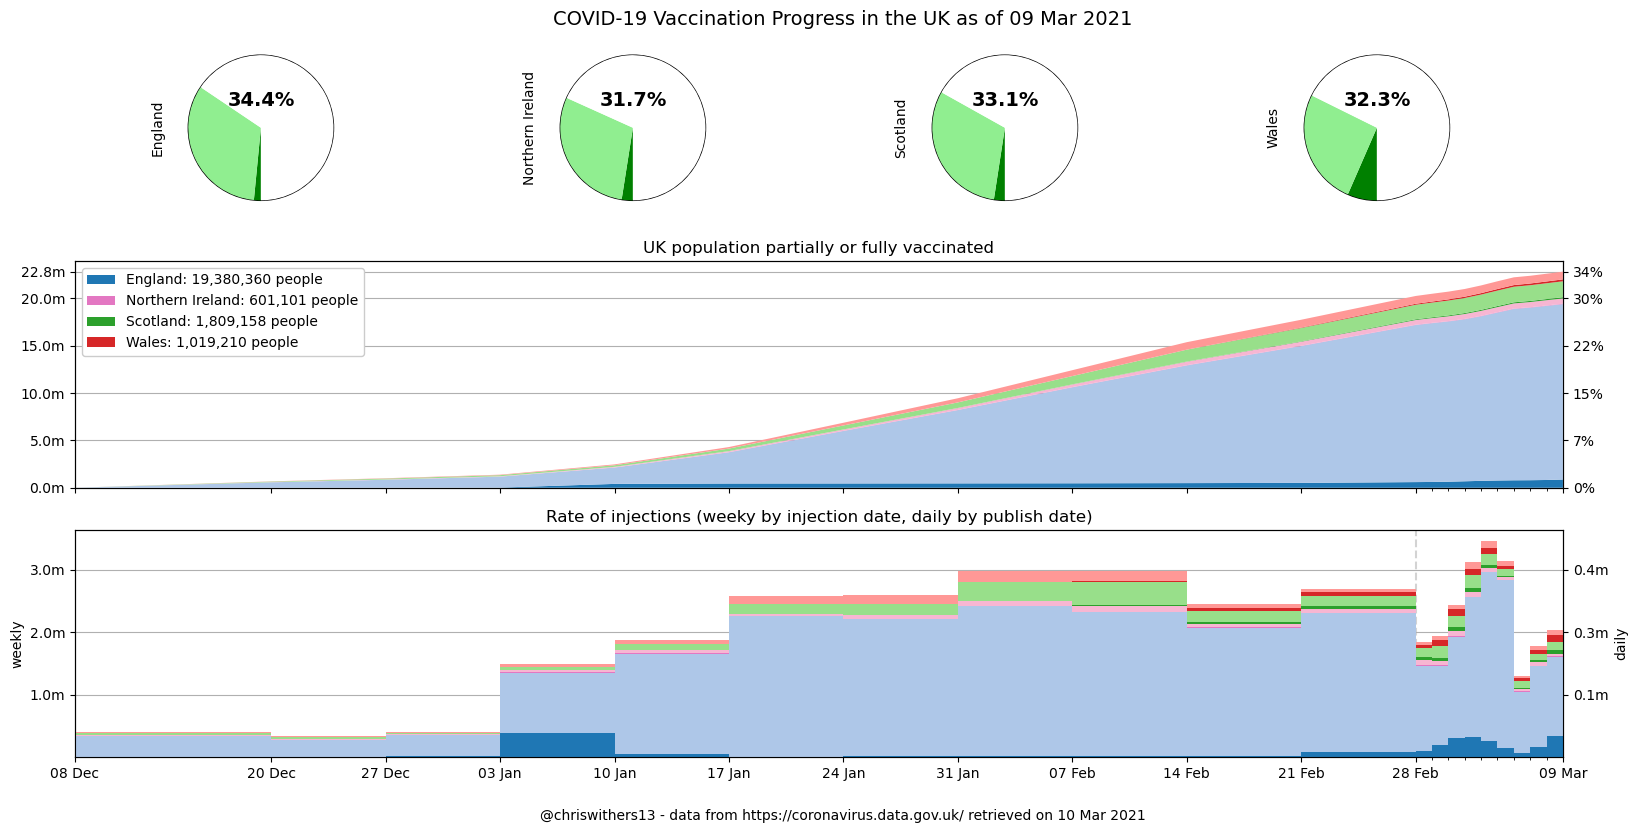

In [4]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,09 Mar 21,"+181,127","+47,151","+47,151","+19,380,360","+868,272","+868,272"
Northern Ireland,09 Mar 21,"+4,574","+2,333","+2,333","+601,101","+46,927","+46,927"
Scotland,09 Mar 21,"+19,781","+9,074","+9,074","+1,809,158","+132,760","+132,760"
Wales,09 Mar 21,"+11,819","+14,364","+14,364","+1,019,210","+206,394","+206,394"


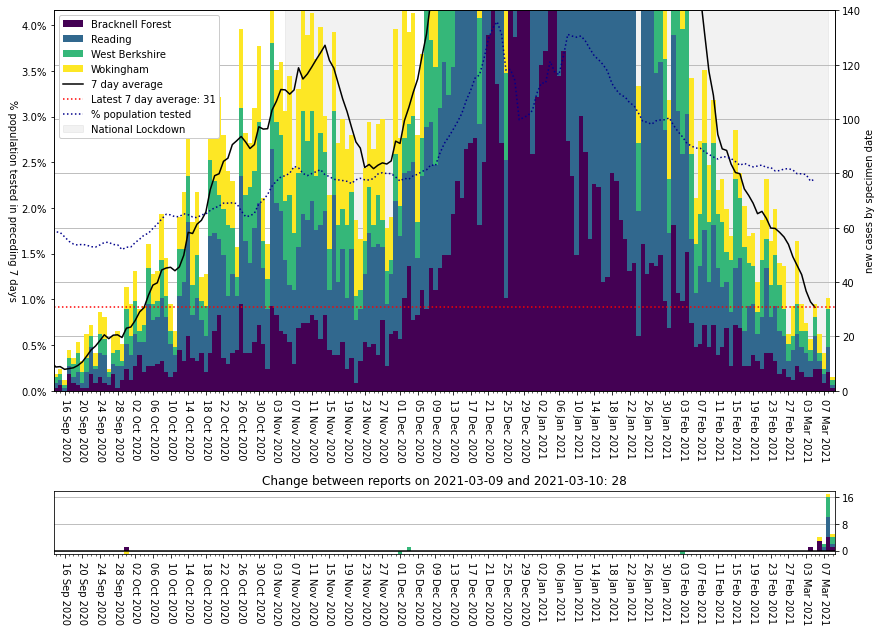

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

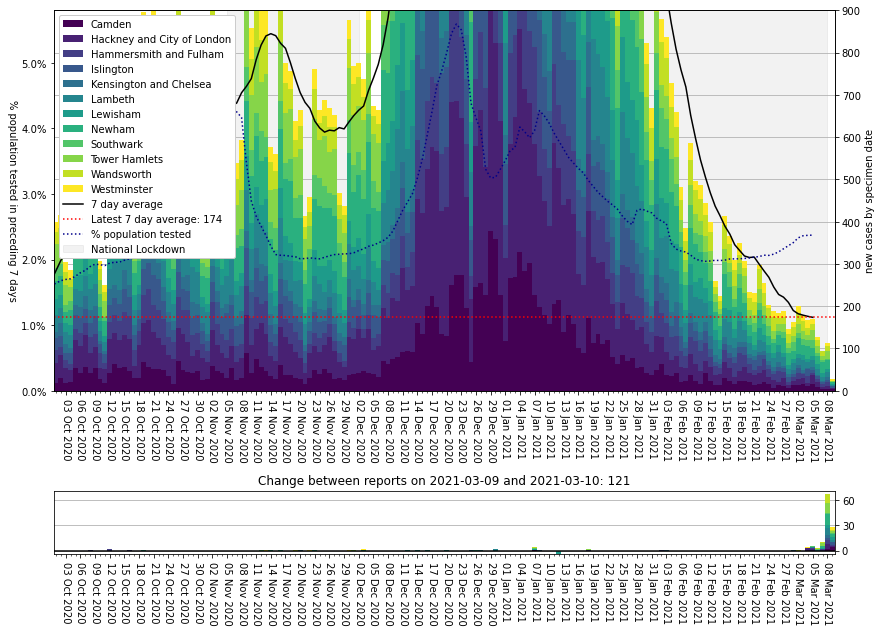

In [7]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000035,Derbyshire Dales,164.535085,119.0,2021-03-09
E06000010,"Kingston upon Hull, City of",138.579864,360.0,2021-03-09
E07000236,Redditch,131.361349,112.0,2021-03-09
E07000123,Preston,129.248611,185.0,2021-03-09
E07000150,Corby,124.622670,90.0,2021-03-09
S12000030,Stirling,124.190638,117.0,2021-03-09
E08000032,Bradford,123.384515,666.0,2021-03-09
E07000171,Bassetlaw,121.744609,143.0,2021-03-09
E08000016,Barnsley,121.523418,300.0,2021-03-09


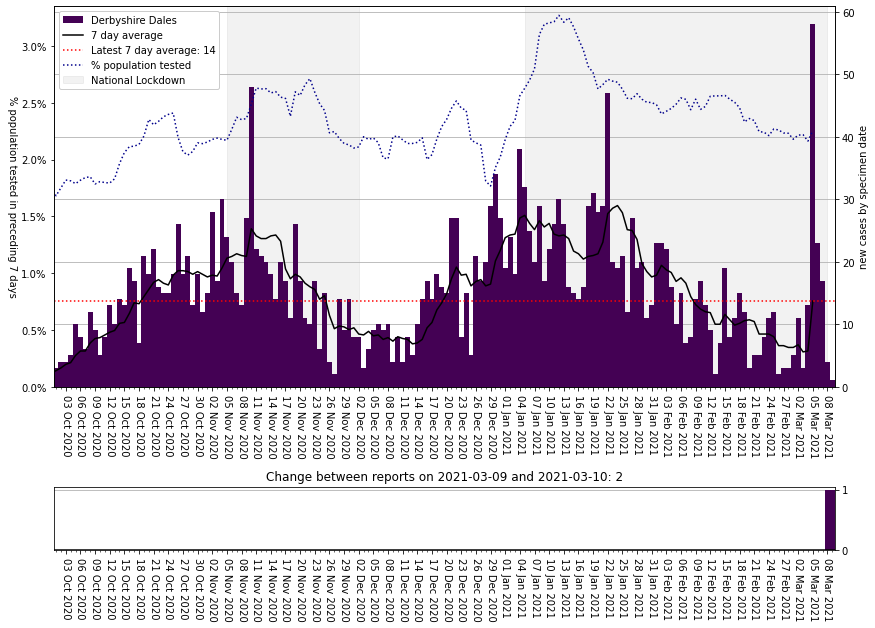

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,69.625929,795.0,2021-03-09
S12000049,Glasgow City,108.194339,685.0,2021-03-09
E08000032,Bradford,123.384515,666.0,2021-03-09
E08000035,Leeds,83.591905,663.0,2021-03-09
E08000019,Sheffield,70.445052,412.0,2021-03-09
E08000034,Kirklees,90.270972,397.0,2021-03-09
E08000036,Wakefield,108.810492,379.0,2021-03-09
E08000003,Manchester,68.010230,376.0,2021-03-09
E06000010,"Kingston upon Hull, City of",138.579864,360.0,2021-03-09


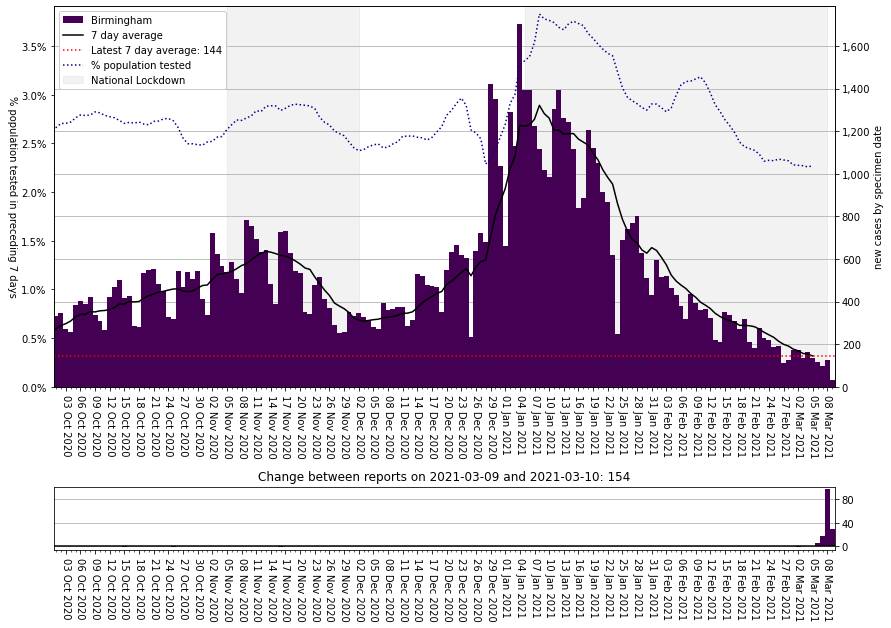

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.8
phe_max = 0.25

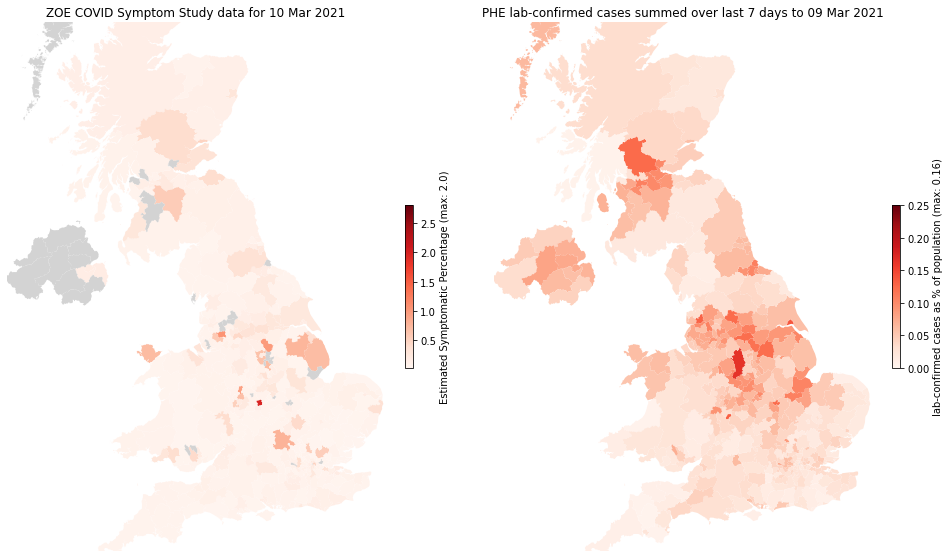

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

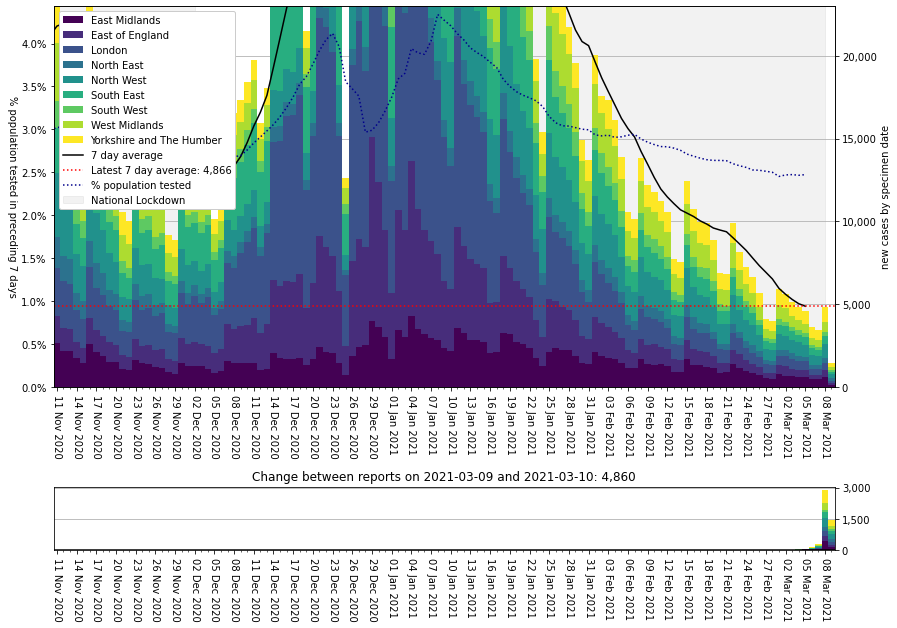

In [18]:
plot_areas(for_date, area_type=region, ylim=23_000, earliest='2020-11-11')

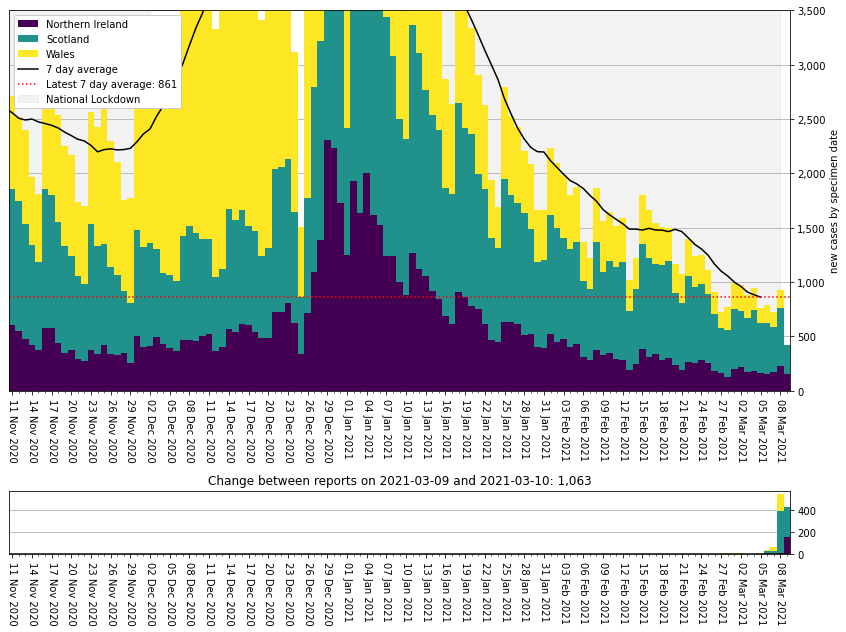

In [19]:
plot_areas(for_date, 'cases_devolved', ylim=3_500, diff_ylims=None, earliest='2020-11-11')